In [9]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from fit_spectra import fit_element, gaussian
from constants import EmissionLines

In [10]:
file = 'manga-12510-12701-LOGCUBE.fits'

with fits.open(file) as cube:
    flux = cube['FLUX'].data
    wave = cube['WAVE'].data
    true_z = cube[0].header['EBVGAL']

In [11]:
element_list = {
    EmissionLines.O_II[0]: {'name': 'O_II', 'popt': None, 'window_centre': 3805, },
    EmissionLines.H_BETA[0]: {'name': 'H_BETA', 'popt': None, 'window_centre': 4965},
    EmissionLines.O_III[1]: {'name': 'O_III', 'popt': None, 'window_centre': 5112},
    EmissionLines.NE_I[0]: {'name': 'NE_I', 'popt': None, 'window_centre': 6528},
    EmissionLines.H_ALPHA[0]: {'name': 'H_ALPHA', 'popt': None, 'window_centre': 6702},
    EmissionLines.N_II[1]: {'name': 'N_II', 'popt': None, 'window_centre': 6722},
    EmissionLines.S_II[0]: {'name': 'S_II', 'popt': None, 'window_centre': 6858},
    EmissionLines.S_II[1]: {'name': 'S_II', 'popt': None, 'window_centre': 6873}
}

spectra = {
    'H_ALPHA': {'bands': [], 'combined': None, 'label': r'H$\alpha$'},
    'H_BETA': {'bands': [], 'combined': None, 'label': r'H$\beta$'},
    'O_II': {'bands': [], 'combined': None, 'label': r'O II'},
    'O_III': {'bands': [], 'combined': None, 'label': r'O III'},
    'NE_I': {'bands': [], 'combined': None, 'label': r'Ne I'},
    'N_II': {'bands': [], 'combined': None, 'label': r'N II'},
    'S_II': {'bands': [], 'combined': None, 'label': r'S II'}
}

wavelengths = np.arange(3600, 7000, 1)

for lambda_rest in element_list:
    window_centre = element_list[lambda_rest]['window_centre']
    name = element_list[lambda_rest]['name']

    *_, popt = fit_element(20, 20, flux, wave, lambda_rest=lambda_rest, window_centre=window_centre, ws=10)

    element_list[lambda_rest]['popt'] = popt
    spectra[name]['bands'].append(gaussian(wavelengths, *popt))



(-0.15, 0.4)

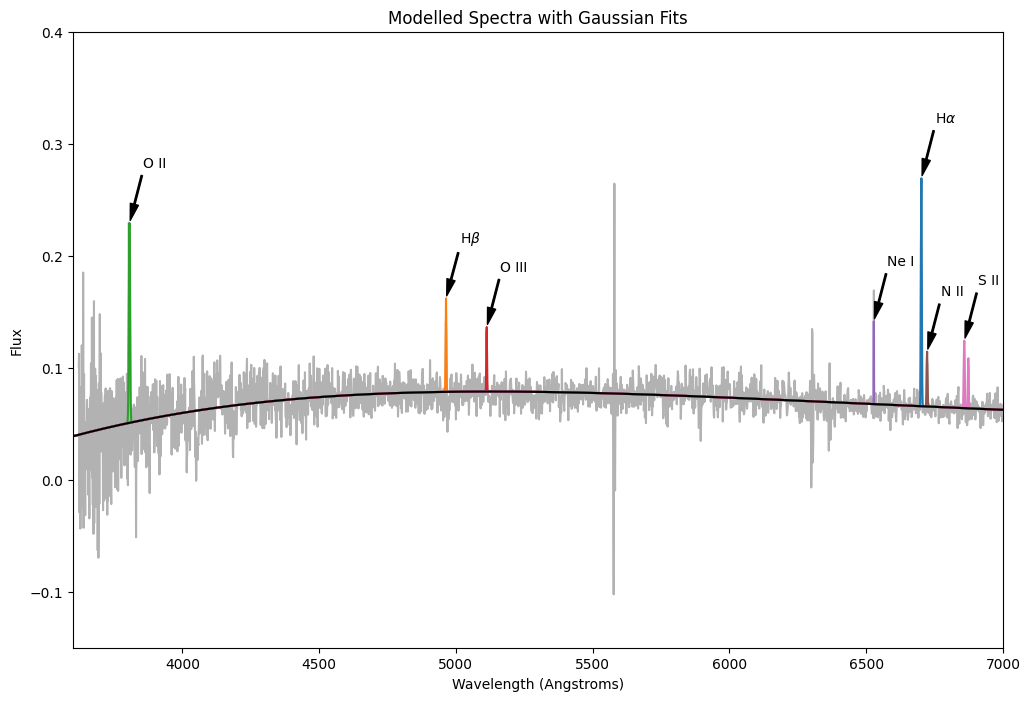

In [12]:
plt.figure(figsize=(12, 8))

plt.plot(wave, flux[:, 20, 20], label='Observed Flux', color='black', alpha=0.3)

flux_poly = np.polyfit(wave, flux[:, 20, 20], 5)
flux_fit = np.polyval(flux_poly, wavelengths)

for name, data in spectra.items():
    grounded = [band - np.min(band) for band in data['bands']]
    data['combined'] = np.sum(grounded, axis=0)
    data['combined'] += flux_fit
    plt.plot(wavelengths, data['combined'])

    peak_x = wavelengths[np.argmax(data['combined'])]
    peak_y = np.max(data['combined'])
    plt.annotate(data['label'], xy=(peak_x, peak_y), xytext=(peak_x + 50, peak_y + 0.05),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=6),)

plt.plot(wavelengths, flux_fit, label='Flux Fit', color='black')

plt.title("Modelled Spectra with Gaussian Fits")
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux')
plt.xlim(3600, 7000)
plt.ylim(-0.15, 0.4)